In [22]:
import pandas as pd
import pickle

seed = 7
results_path = f'results_reg/seed{seed}_0.05/results.pkl'

with open(results_path, 'rb') as f:
    results = pickle.load(f)
    index = range(5, (len(results)+1)* 5, 5)
    results_reg = pd.DataFrame(results, index = index)


results_path = f'results/seed{seed}/results.pkl'
with open(results_path, 'rb') as f:
    results = pickle.load(f)[:len(results_reg)]
    index = range(5, (len(results)+1)* 5, 5)
    results = pd.DataFrame(results, index = index)



In [34]:
# now we measure training accuracy
from utils.resnet import resnet18
import torch
from utils import get_cifar10_loaders, eval_on_dataloader
from tqdm import tqdm

checkpoints_path = f'results/seed{seed}/checkpoints/'

loaders_half = get_cifar10_loaders(0.5, seed = 7)
train_loader = loaders_half['train_loader']

accuracies = []
for epoch in tqdm(index):
    model = resnet18()
    checkpoint_path = f'{checkpoints_path}warm_up_{epoch}.pt'
    model.load_state_dict(torch.load(checkpoint_path))
    model.to('cuda')
    accuracies.append(eval_on_dataloader(model, train_loader))

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 23/23 [02:20<00:00,  6.10s/it]


I should also do that with test accuracy on half dataset...

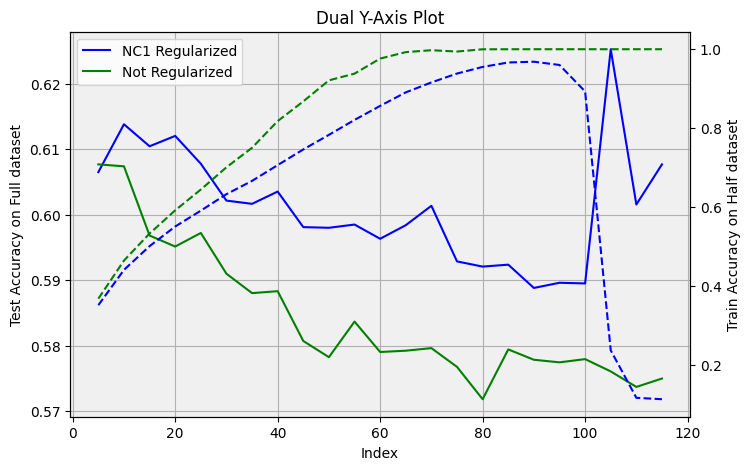

In [45]:
y1 = results_reg['test_acc']
y2 = results['test_acc']
y3 = results_reg['train_acc_half']
y4 = accuracies

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5))

# Plotting the first set of data on the left y-axis
ax1.plot(index, y1, label='NC1 Regularized', color='blue')
ax1.plot(index, y2, label='Not Regularized',  color='green')

# Creating a secondary y-axis for the second set of data
ax2 = ax1.twinx()

# Plotting the second set of data on the right y-axis
ax2.plot(index, y3, label='train_acc_reg', color='blue', linestyle='--' )
ax2.plot(index, y4, label='train_acc',color='green', linestyle='--')

# Adding labels and title to the plot
ax1.set_xlabel('Index')
ax1.set_ylabel('Test Accuracy on Full dataset', color='black')
ax2.set_ylabel('Train Accuracy on Half dataset', color='black')

ax1.set_facecolor('#f0f0f0')
plt.title('Dual Y-Axis Plot')


ax1.grid()
# Displaying legends
ax1.legend(loc='upper left')
#ax2.legend(loc='lower left')

# Show the plot
plt.show()
